# Método de Bisección

Este método esta basado en el hecho de que la raíz de una ecuación $y=f(x)$ es el punto donde la curva asociada a ella, cruza el eje $x$. 

Por ejemplo la gráfica de $y=2x^{2}-5x+3$ es


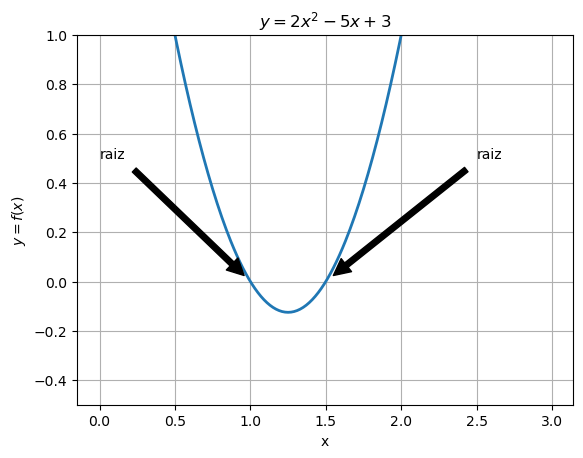

In [2]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.subplot(111)

t = np.arange(0.0, 3.0, 0.01)
s = 2*t**2-5*t+3  # np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('raiz', xy=(1.5, 0), xytext=(2.5, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('raiz', xy=(1.0, 0), xytext=(0, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.grid(True)
plt.ylim(-0.5, 1)

plt.title("$y=2x^2-5x+3$")
#plt.plot(s, label='linear')
#plt.legend(loc='upper left', frameon=True)
plt.ylabel('$y = f(x)$')
plt.xlabel('x')

#plt.show()

plt.savefig('../fig/raices.png')

La curva cruza el eje $x$ en 1 y en 1.5 (es decir cuando $y=0$), que son las raices de la ecuación.

El método de bisección busca las raices a lo largo del eje $x$, a partir de usar el criterio de que al ser raiz, debe encontrarse entre dos puntos en $x$ cuyos valores correspondientes en $y$ tienen signos opuestos.
1. Se escoge un intervalo en $x$ donde esté contenida la raíz.
2. Al tener un intervalo en $x$ donde se encuentra una raíz, el método afina la posición de dicha raíz, por particiones a la mitad del intervalo de manera sucesiva (por ello el método es llamado **bisección**.
3. La bisección sucesiva del intervalo, hace que se refine la posición de la raíz, y sucede hasta que la evaluación en los extremos del intervalo, dé como resultado valores de $y$ prácticamente iguales.

Una vez que se encuentra de esta manera una raíz, se puede comenzar con el algoritmo usando otro intervalo de búsqueda en $x$.

## Pseudocódigo

<center> <div> <img src="../fig/pseudocode2.png" alt="Drawing" style="width: 500px;"/></div>


# Ejemplo 1

Encuentra las raices de la siguiente ecuación

\begin{equation*}
2x^2-5x+3=0
\end{equation*}

Reescribimos la ecuación como una función $y=f(x)$

\begin{equation*}
y=2x^2-5x+3
\end{equation*}

Usando esta función y el pseudocódigo anterior, implementemos un algoritmo para comenzar a probar el método.

In [3]:
# Metodo de Biseccion para el Ejemplo 1
x1 = 0                # primer valor del intervalo
x2 = 1.2               # segudo valor del intervalo
y1 = 2*x1**2-5*x1+3    # calcula y1
y2 = 2*x2**2-5*x2+3    # calcula y2
if y1*y2 > 0:          # prueba si los signos son iguales
    print('No hay raices en el intervalo dado')
    exit               # termina el programa  #falta encontrar el buen EXIT!!
for i in range(1,101): # asume que 100 bisecciones son suficientes
  xh = (x1+x2)/2         # calcula el valor medio
  yh = 2*xh**2-5*xh+3    # calcula el valor de y en el valor medio yh
  y1 = 2*x1**2-5*x1+3    # calcula y1
  if abs(y1) < 1.0e-6:   # condicion de acercamiento a la solucion (tol)
    break                  # salir del loop
  elif y1*yh < 0:        # si el signo es diferente quedarse en la primera mitad
    x2 = xh                # que x2 sea el punto medio
  else:                  # si el signo es igual quedarse en la segunda mitad
    x1 = xh                # que x1 sea el punto medio
print('La raiz es: %.5f' % x1)
print('Numero de bisecciones: %d' % i)

La raiz es: 1.00000
Numero de bisecciones: 21


Si cambias el intervalo de inicio a $x1 = 1.1$ y $x2 = 2$, obtienes la segunda raíz:

La raiz es: 1.50000

Numero de bisecciones: 21

Esta es la manera más simple de implementar el método de bisección, pero hay un par de modificaciones que hacen mucho mejor el algoritmo.

# Método de Bisección ... mejorado

Tuvimos que repetir el cálculo de valores de $y$ cuatro veces en el código. Esto puede ser suceptible a errores, sobre todo cuando estemos implementando el algoritmo para ecuaciones grandes. 

Lo mejor es que definamos una función que incluya la ecuación y que la estemos llamando cada vez que queremos evaluarla para diferentes valores de $x$.


Hay dos maneras simples de construir funciones en **Python**

* Funciones lambda, por ejemplo: y = $\lambda$ x: 2*x**2 - 5*x + 3
* Funciones generales, por ejemplo:

In [4]:
# Funciones generales
 
def  y(x):
    y = 2*x**2 - 5*x + 3
    return y

o simplemente


In [ ]:
# Funciones generales
 
def  y(x):
    return 2*x**2 - 5*x + 3

# Ejemplo 2: Método de Bisección mejorado

In [5]:
# Metodo de Biseccion Mejorado para el Ejemplo de clase

def y(x):                    # define la funcion y(x)
  y = 2*x**2 - 5*x + 3
  return y

x1 = float(input('Captura el valor de x1: ')) # peticion de valor x1
x2 = float(input('Captura el valor de x2: ')) # peticion de valor x2
y1 = y(x1)                                    # evalua la funcion y(x1)
y2 = y(x2)                                    # evalua la funcion y(x1)

if y1*y2 > 0:                                 # prueba si los signos son iguales
  print('No hay raices en el intervalo')
  exit

for i in range(100):
  xh = (x1+x2)/2
  yh = y(xh)                                  # evalua la funcion y(xh)
  y1 = y(x1)                                  # evalua la funcion y(x1)
  if abs(y1) < 1.0e-6:
    break
  elif y1*yh < 0:
    x2 = xh
  else:
    x1 = xh
print('La raiz es: %.5f' % x1)
print('Numero de bisecciones: %d' % (i+1))

No hay raices en el intervalo
La raiz es: 7.00000
Numero de bisecciones: 100


# Puedes encontrar raices usando SciPy

En el módulo para optimización [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) (Scientific Python), hay muchas herramientas para encontrar raices.

Este módulo sirve para resolver diferentes tipos de ecuaciones usando métodos numéricos avanzados. 

Podemos usar algunas de las funciones de este módulo **newton()**, **bisect()**, **fsolve()** and **root()** directamente en la consola de **Python**

# Ejemplo 3: Encontrando raices con diferentes metodos usando Scipy

In [6]:
from scipy.optimize import newton, bisect, fsolve, root
f  = lambda x: 2*x**2-5*x + 3
print(newton(f, 0)) # entradas son funcion y valor prueba
print(newton(f, 3))
print(bisect(f,0,1.2)) # entradas son funcion e intervalo inicial
print(bisect(f,1.2,4))
print(fsolve(f,0)) # entradas son funcion y valor prueba
print(fsolve(f, 2))
print(fsolve(f,[0, 1, 2]))

0.9999999999999999
1.5000000000000004
0.9999999999996361
1.4999999999994542
[1.]
[1.5]
[1.  1.  1.5]


In [7]:
import math
def root(x):
    return(math.cos(x)-math.sin(x))

def bisection_method(f, a, b, tol):
    if f(a)*f(b) > 0:
        #end function, no root.
        print("No root found.")
    else:
        iter = 0
        while (b - a)/2.0 > tol:
            midpoint = (a + b)/2.0
            yield iter, abs(f(midpoint)), midpoint
            if f(a)*f(midpoint) < 0: # Increasing but below 0 case
                b = midpoint
            else:
                a = midpoint
            iter += 1

import numpy as np
np.array(list(bisection_method(root, 0, 1.57, 10e-3)))


array([[0.00000000e+00, 5.63088062e-04, 7.85000000e-01],
       [1.00000000e+00, 5.40415665e-01, 1.17750000e+00],
       [2.00000000e+00, 2.75209010e-01, 9.81250000e-01],
       [3.00000000e+00, 1.37986732e-01, 8.83125000e-01],
       [4.00000000e+00, 6.87946039e-02, 8.34062500e-01],
       [5.00000000e+00, 3.41260256e-02, 8.09531250e-01],
       [6.00000000e+00, 1.67827312e-02, 7.97265625e-01]])